In [1]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [2]:
data = et.data.get_data("cold-springs-fire")

os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [3]:
landsat_post_fire_path = os.path.join("cold-springs-fire","landsat_collect", "LC080340322016072301T1-SC20180214145802","crop")

In [4]:
post_fire_paths = glob(os.path.join(landsat_post_fire_path, "*band*.tif"))

post_fire_paths.sort()
post_fire_paths

['cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band1_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band2_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band3_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band4_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band5_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band6_crop.tif',
 'cold-springs-fire/landsat_collect/LC080340322016072301T1-SC20180214145802/crop/LC08_L1TP_034032_20160723_20180131_01_T1_sr_band7_crop.tif']

In [5]:
band_1 = rxr.open_rasterio(post_fire_paths[0], masked=True)
band_1.shape

(1, 177, 246)

In [6]:
band_1 = rxr.open_rasterio(post_fire_paths[0], masked=True).squeeze()
band_1.shape

(177, 246)

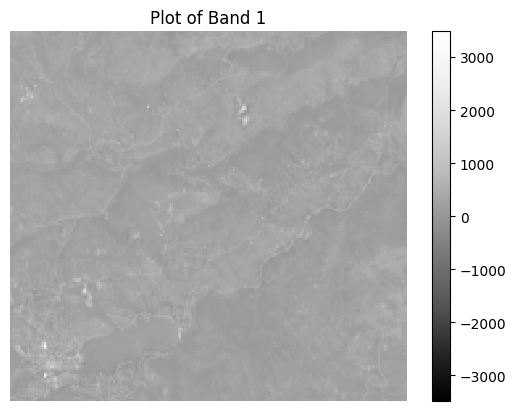

In [7]:
f, ax=plt.subplots()
band_1.plot.imshow(ax=ax, cmap="Greys_r")
ax.set_axis_off()
ax.set_title("Plot of Band 1")
plt.show()

In [8]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [9]:
all_bands = []
for i, aband in enumerate(post_fire_paths):
    all_bands.append(open_clean_bands(aband))
    all_bands[i]["band"]=i+1

In [10]:
landsat_post_fire_xr = xr.concat(all_bands, dim="band") 
landsat_post_fire_xr

<xarray.DataArray (band: 7, y: 177, x: 246)> Size: 1MB
array([[[ 446.,  476.,  487., ...,  162.,  220.,  260.],
        [ 393.,  457.,  488., ...,  200.,  235.,  296.],
        [ 364.,  393.,  388., ...,  246.,  298.,  347.],
        ...,
        [ 249.,  283.,  363., ...,  272.,  268.,  284.],
        [ 541.,  474.,  364., ...,  260.,  269.,  285.],
        [ 219.,  177.,  250., ...,  271.,  271.,  286.]],

       [[ 515.,  547.,  572., ...,  181.,  233.,  261.],
        [ 440.,  519.,  571., ...,  211.,  251.,  322.],
        [ 411.,  460.,  449., ...,  264.,  326.,  387.],
        ...,
        [ 387.,  326.,  427., ...,  288.,  278.,  301.],
        [ 554.,  654.,  433., ...,  276.,  276.,  293.],
        [ 291.,  174.,  291., ...,  292.,  290.,  304.]],

       [[ 782.,  772.,  843., ...,  335.,  390.,  411.],
        [ 684.,  771.,  836., ...,  363.,  412.,  511.],
        [ 656.,  725.,  706., ...,  425.,  518.,  599.],
        ...,
...
        ...,
        [1900., 1917., 2076., ..., 1722., 1891., 1890.],
        [1779., 1893., 1983., ..., 1645., 1847., 2090.],
        [1553., 1440., 1587., ..., 1562., 1689., 1964.]],

       [[2864., 2974., 3108., ...,  983., 1195., 1271.],
        [2527., 2827., 3008., ..., 1132., 1293., 1546.],
        [2141., 2427., 2433., ..., 1324., 1652., 1922.],
        ...,
        [1662., 1757., 1922., ..., 1463., 1472., 1519.],
        [1786., 1532., 1554., ..., 1374., 1423., 1450.],
        [1071.,  943.,  975., ..., 1524., 1461., 1518.]],

       [[1920., 1979., 2098., ...,  537.,  660.,  687.],
        [1505., 1863., 1975., ...,  651.,  747.,  924.],
        [1240., 1407., 1391., ...,  769., 1018., 1189.],
        ...,
        [1216., 1190., 1398., ...,  877.,  890.,  928.],
        [1517., 1184., 1078., ...,  846.,  810.,  820.],
        [ 660.,  593.,  623., ...,  984.,  909.,  880.]]], dtype=float32)
Coordinates:
  * band         (band) int64 56B 1 2 3 4 5 6 7
  * x            (x) float64 2kB 4.557e+05 4.557e+05 ... 4.63e+05 4.63e+05
  * y            (y) float64 1kB 4.428e+06 4.428e+06 ... 4.423e+06 4.423e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:       Area
    STATISTICS_MAXIMUM:  3483
    STATISTICS_MEAN:     297.16466859584
    STATISTICS_MINIMUM:  -57
    STATISTICS_STDDEV:   119.61507774931
    scale_factor:        1.0
    add_offset:          0.0

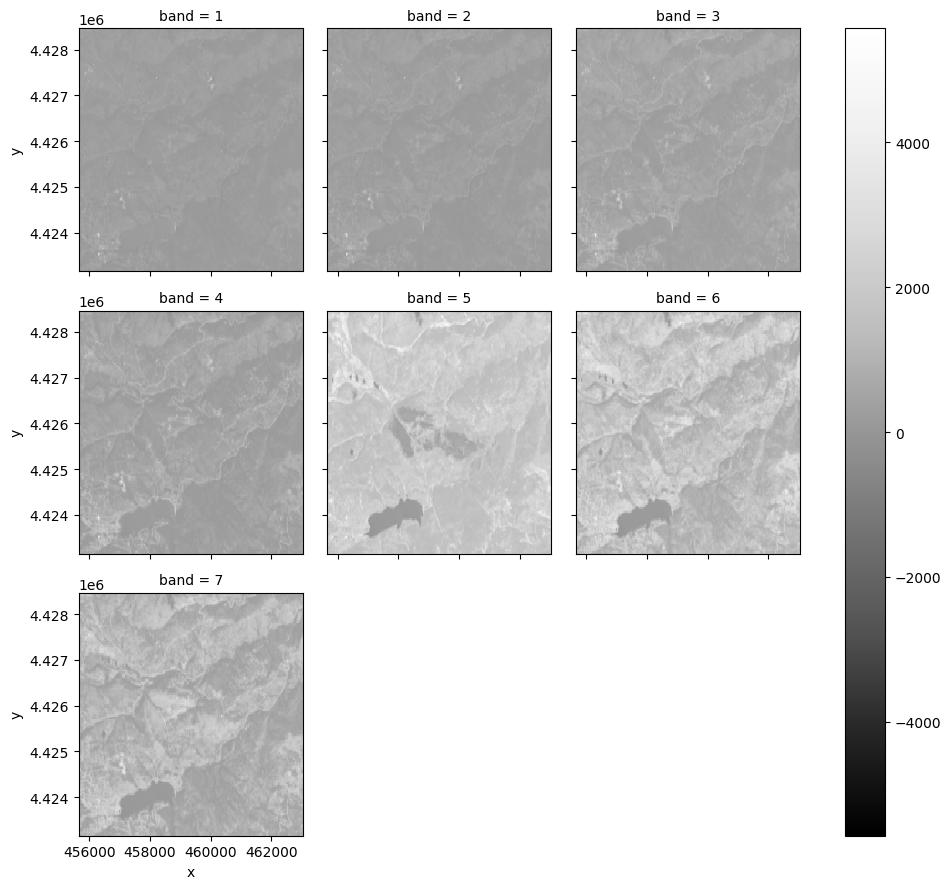

In [11]:
landsat_post_fire_xr.plot.imshow(col="band", col_wrap=3, cmap="Greys_r")
plt.show()

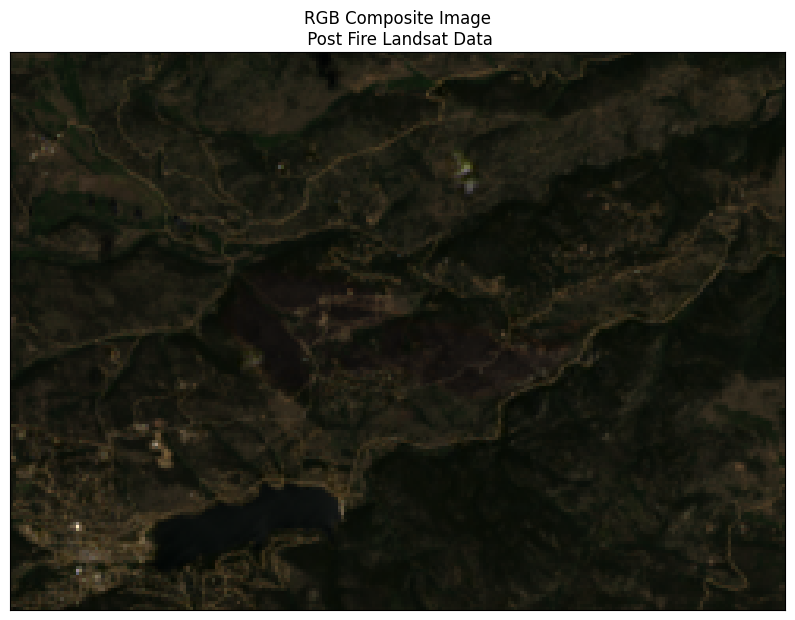

In [12]:
ep.plot_rgb(landsat_post_fire_xr.values, rgb=[3, 2, 1], title="RGB Composite Image\n Post Fire Landsat Data")
plt.show()

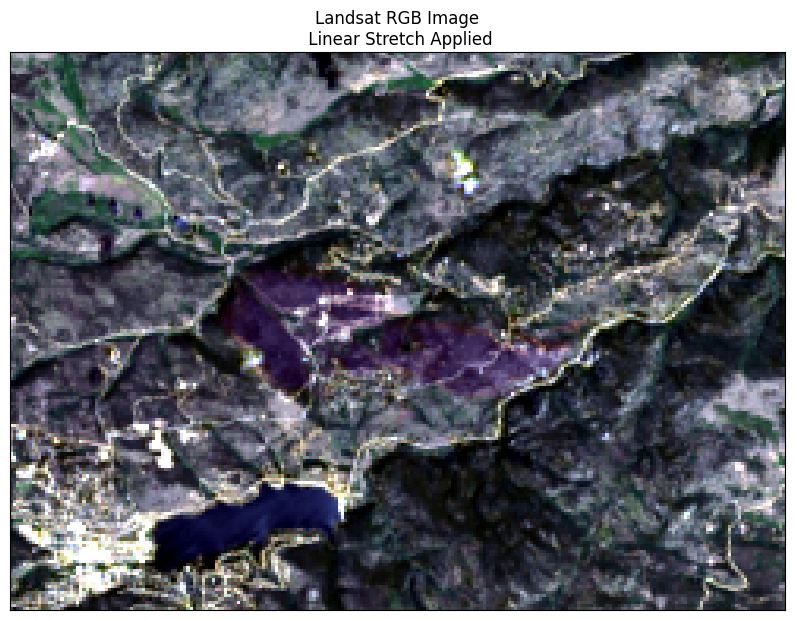

In [13]:
ep.plot_rgb(landsat_post_fire_xr.values, rgb=[3, 2, 1], title="Landsat RGB Image\n Linear Stretch Applied", stretch=True, str_clip=1)
plt.show()

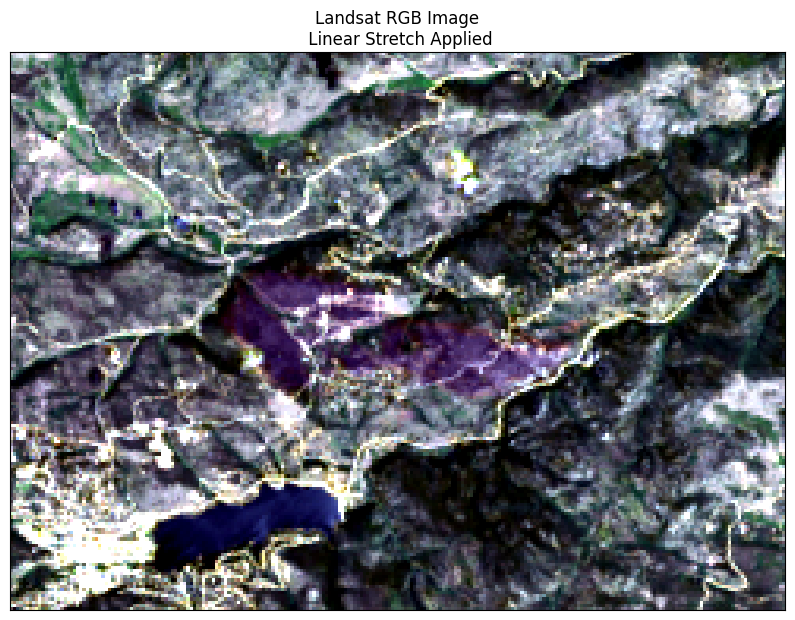

In [14]:
ep.plot_rgb(landsat_post_fire_xr.values, rgb=[3, 2, 1], title="Landsat RGB Image\n Linear Stretch Applied", stretch=True, str_clip=4)
plt.show()

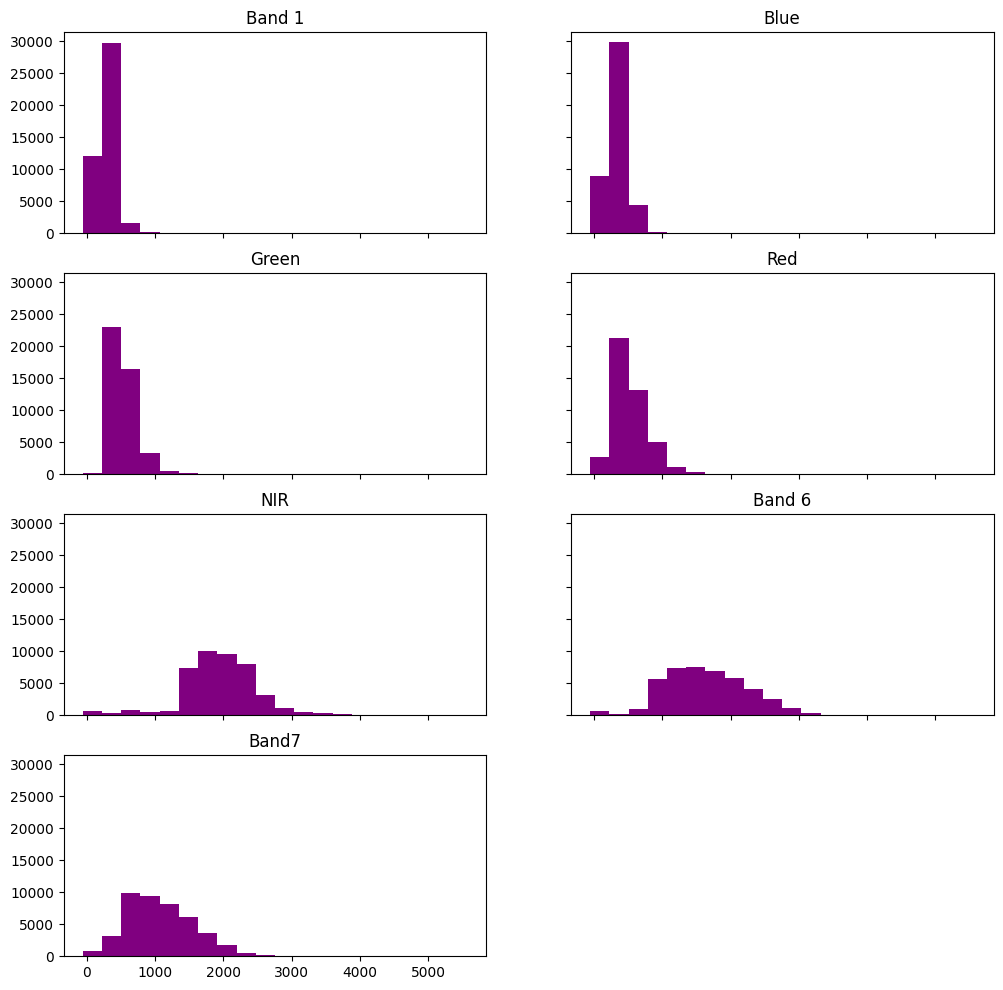

In [15]:
band_titles = ["Band 1", 
               "Blue", 
               "Green", 
               "Red",
               "NIR", 
               "Band 6", 
               "Band7"]

ep.hist(landsat_post_fire_xr.values,
        title=band_titles)

plt.show()

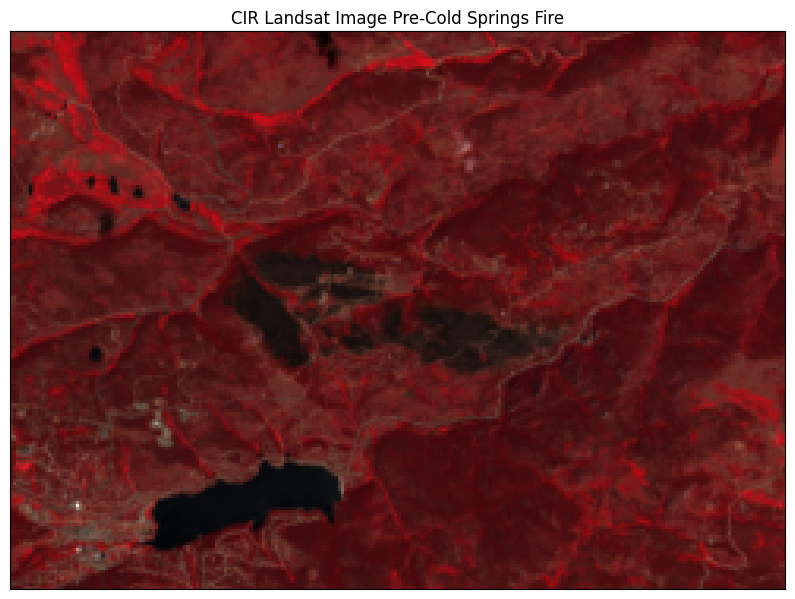

In [16]:
ep.plot_rgb(landsat_post_fire_xr.values, rgb=[4, 3, 2], title="CIR Landsat Image Pre-Cold Springs Fire",figsize=(10, 10))
plt.show()